# Leer archivos de MotionDAQ a un array de Numpy
----

Comenzamos cargando los paquetes habituales para analisis de datos

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

La siguiente funcion lee los contenidos (datos) de un archivo exportado desde el programa MotionDAQ (de adquisicion de datos asistida por computadora) y lo transforma en una o varias variables en la forma de arrays de Numpy.

In [18]:
def leer_archivo_motion_daq(filename):
    import numpy as np
    from pandas import read_csv
    result = []
    # Leer el archivo, separado por tabulaciones, salteando 3 lineas de header
    # y empleando la coma como separador decimal
    df = read_csv(filename, sep='\t', skiprows=3, decimal=',')
    # Convertir el dataframe de pandas a un array de numpy
    nparray = df.to_numpy()
    # Remover los posibles nans del archivo (en caso de que existiesen)
    nparray = nparray[~np.isnan(nparray).any(axis=1)]
    # Asignar cada columna del array a una variable de salida
    for cols in range(nparray.shape[1]):
        out = nparray[:,cols]
        result.append(out)

    return result

Para utilizarlo, lo que tienen que hacer es:

- copiar la definicion anterior a sus notebooks,
- subir el archivo de datos que deseen cargar a Google Colab, y
- ejecutar la linea de codigo mostrada aqui debajo

In [19]:
ts, ph = leer_archivo_motion_daq('testdata.txt')

En la linea aqui arriba, estamos asumiendo que el archivo de datos tiene como nombre `testdata.txt`, uds. cambien dicho nombre por aquel que hayan asignado a sus datos.

Construimos el plot asociado, solo para verificar que los datos sean lo que esperamos.

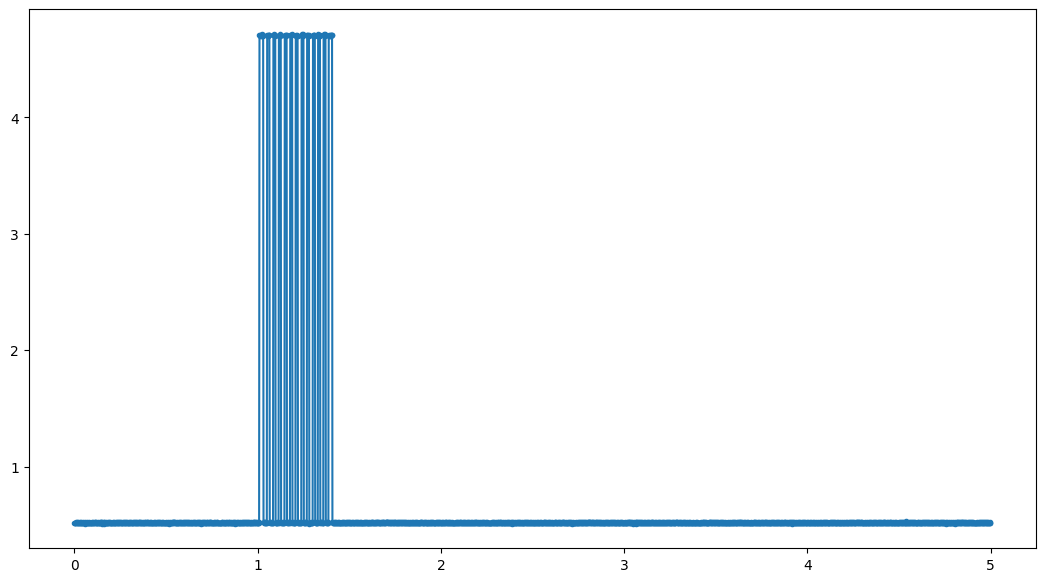

In [23]:
plt.figure(figsize=(13,7))
plt.plot(ts, ph, '.-')

Podemos también visualizar los primeros valores de cada vector y compararlos con los contenidos del archivo de datos exportado desde MotionDAQ, para asegurarnos no perder ninguno:

In [24]:
ts[:10]

array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
       0.018])

In [25]:
ph[:10]

array([0.5134931, 0.5160031, 0.518513 , 0.518513 , 0.518513 , 0.5235329,
       0.5134931, 0.5235329, 0.5134931, 0.5235329])